Group Contributions Statement

Data Import and Cleaning

In [239]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

penguins = pd.read_csv("palmer_penguins.csv")

# split data into training and test
from sklearn.model_selection import train_test_split

np.random.seed(111)
train, test = train_test_split(penguins, test_size = 0.2)

# clean the split data, define a function first
from sklearn import preprocessing
def prep_penguins_data(data_df):
    df = data_df.copy()
    le = preprocessing.LabelEncoder()
    df['Sex'] = le.fit_transform(df['Sex'])
    #df['Island'] = le.fit_transform(df['Island'])
    df = df.drop(['Comments'], axis = 1)
    df = df.drop(['studyName'], axis = 1)
    df["Species"] = df["Species"].str.split().str.get(0)
    # drop the NaN values
    df = df.dropna()
    
    X = df.drop(['Species'], axis = 1)
    y = df['Species']
        
    return(X, y)

X_train, y_train = prep_penguins_data(train)
X_test,  y_test  = prep_penguins_data(test)



X_test.head()
#y_test.head()

,Sample Number,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
291,72,Anvers,Biscoe,"Adult, 1 Egg Stage",N54A2,Yes,11/3/08,46.4,15.6,221.0,5000.0,1,8.35078,-26.70783
26,27,Anvers,Biscoe,"Adult, 1 Egg Stage",N17A1,Yes,11/12/07,40.6,18.6,183.0,3550.0,1,8.93997,-25.36288
49,50,Anvers,Dream,"Adult, 1 Egg Stage",N30A2,Yes,11/13/07,42.3,21.2,191.0,4150.0,1,8.87988,-25.18543
342,123,Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,0,8.24246,-26.11969
18,19,Anvers,Torgersen,"Adult, 1 Egg Stage",N10A1,Yes,11/16/07,34.4,18.4,184.0,3325.0,0,8.47827,-25.23319


Exploratory Analysis

CV score is 0.806
CV score is 0.985
CV score is 0.891
CV score is 0.955
CV score is 0.884
CV score is 0.813
CV score is 0.963
CV score is 0.937
CV score is 0.959
CV score is 0.963
CV score is 0.821
CV score is 0.855
CV score is 0.966
CV score is 0.884
CV score is 0.795


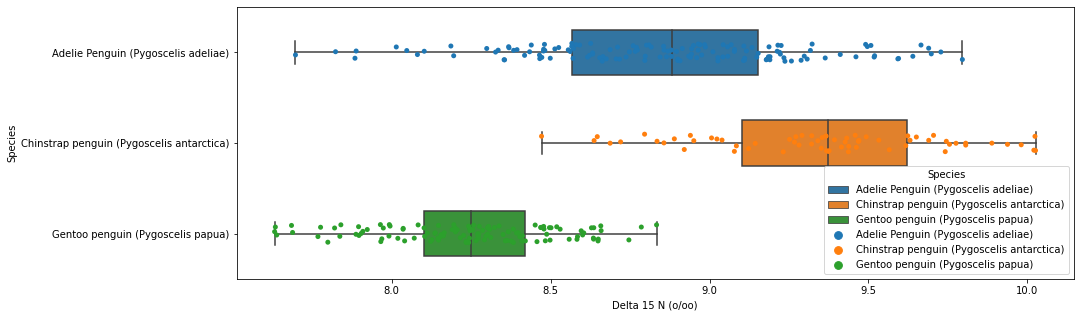

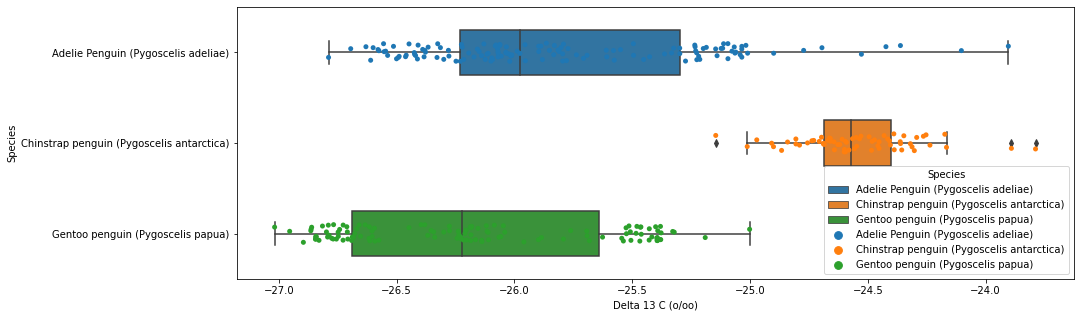

In [241]:
# summary table
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

def penguin_summary_table(group_cols,value_cols):
    summary = penguins.groupby(group_cols)[value_cols].aggregate(np.mean).round(2)
    return summary

penguins_table = penguin_summary_table(["Island","Species"], 
                      ["Flipper Length (mm)", "Body Mass (g)", "Culmen Depth (mm)","Culmen Length (mm)","Delta 15 N (o/oo)"])
penguins_table = penguins_table.dropna()

import seaborn as sns
fig,ax = plt.subplots(1, figsize = (15,5))
fig = sns.boxplot(data = penguins, x="Delta 15 N (o/oo)",y="Species", hue = "Species", dodge = False, width=0.5)
fig = sns.stripplot(data = penguins, x="Delta 15 N (o/oo)", y="Species", hue = "Species")
fig2,ax = plt.subplots(1, figsize = (15,5))
fig2 = sns.boxplot(data = penguins, x="Delta 13 C (o/oo)", y="Species", hue = "Species", dodge = False, width=0.5)
fig2 = sns.stripplot(data = penguins, x="Delta 13 C (o/oo)", y="Species", hue = "Species")

cols = ["Sex","Island","Culmen Depth (mm)","Culmen Length (mm)","Body Mass (g)","Delta 15 N (o/oo)", "Delta 13 C (o/oo)"]

def check_column_score(cols):
    LR = LogisticRegression(solver='lbfgs', max_iter=1000)
    return cross_val_score(LR,X_train[cols],y_train,cv=5).mean()
    
combos = [["Island", "Flipper Length (mm)", "Body Mass (g)"],
          ["Island", "Culmen Length (mm)", "Culmen Depth (mm)"],
          ["Island", "Delta 15 N (o/oo)", "Delta 13 C (o/oo)"],
          ["Island", "Flipper Length (mm)", "Culmen Length (mm)"],
          ["Island", "Flipper Length (mm)", "Culmen Depth (mm)"],
          ["Island", "Culmen Depth (mm)", "Body Mass (g)"],
          ["Island", "Culmen Length (mm)", "Body Mass (g)"], 
          ["Island", "Culmen Depth (mm)", "Delta 13 C (o/oo)"], 
          ["Island", "Culmen Length (mm)", "Delta 13 C (o/oo)"], 
          ["Island", "Flipper Length (mm)", "Delta 13 C (o/oo)"], 
          ["Island", "Body Mass (g)", "Delta 13 C (o/oo)"],
          ["Island", "Culmen Depth (mm)", "Delta 15 N (o/oo)"], 
          ["Island", "Culmen Length (mm)", "Delta 15 N (o/oo)"], 
          ["Island", "Flipper Length (mm)", "Delta 15 N (o/oo)"],
          ["Island", "Body Mass (g)", "Delta 15 N (o/oo)"],]

X_train.replace(("Dream", "Torgersen","Biscoe"), (0,1,2), inplace=True)
combs = []
scores = []

for combo in combos:
    x=check_column_score(combo)
    scores.append(x)
    print("CV score is "+ str(np.round(x,3)))
    
totals = []
for ind in range(len(combs)):
    totals.append(tuple((scores[ind], combs[ind])))

totals.sort(reverse = True)

for eachScore in totals:
    print(eachScore)

Feature Selection

The accuracy of this model on the testing data is 0.9516129032258065
The mislabels in the model are: ['Adelie' 'Gentoo']
The correct species for these penguins are: 
[182    Chinstrap
111       Adelie
Name: Species, dtype: object]
[[24  0  1]
 [ 1 12  0]
 [ 0  0 24]]


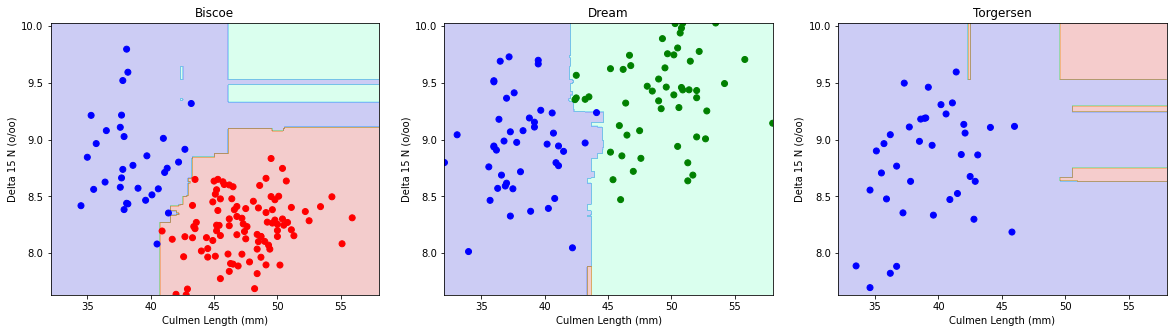

In [240]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
pd.options.mode.chained_assignment = None

#further clean the data so we only have our selected features
X_train_RF = X_train[["Island", "Culmen Length (mm)", "Delta 15 N (o/oo)"]].copy()
X_train_RF.replace(("Biscoe","Dream","Torgersen"), (3,4,5), inplace=True)
X_test_RF = X_test[["Island", "Culmen Length (mm)", "Delta 15 N (o/oo)"]].copy()
X_test_RF.replace(("Biscoe","Dream","Torgersen"), (3,4,5), inplace=True)


N=50
scores=np.zeros(N)
best_score = -np.inf

#use cross-validation to pick our complexity parameters (n_estimators)
for d in range(1,N+1):
    RF = RandomForestClassifier(n_estimators = d)
    scores[d-1]=cross_val_score(RF,X_train_RF,y_train,cv=5).mean()
    if scores[d-1]>best_score:
        best_score=scores[d-1]
        best_depth=d

RF = RandomForestClassifier(n_estimators = best_depth) #use the best_depth from above to model
RF.fit(X_train_RF,y_train) #fit our data
print("The accuracy of this model on the testing data is " + str(RF.score(X_test_RF,y_test))) #evaluate our accuracy on the testing data


def confusion_matrix_func(model, X_train_model, X_test_model):
    """
    returns the confusion matrix evaluated only on the test data, not the training data
    input parameters: model (the type of model used), X_train_model (training data that only has the selected features),
    X_test_model (test data that only has the selected features)
    output: c (a 3x3 confusion matrix)
    """
    model.fit(X_train_model, y_train) 
    y_test_pred = model.predict(X_test_model) 
    c = confusion_matrix(y_test,y_test_pred) 
    mask = y_test != y_test_pred  #create a mask to see where the predictions do not align with the data
    mistakes = X_test_model[mask]
    mistake_labels = y_test[mask]
    mistake_preds = y_test_pred[mask]
    print("The mislabels in the model are: " + str(mistake_preds)) #these are the errors in the model
    print("The correct species for these penguins are: " + "\n" + str([mistake_labels])) #these are the actual data points
    return c

print(confusion_matrix_func(RF, X_train_RF, X_test_RF))


X = X_train[["Island", "Culmen Length (mm)", "Delta 15 N (o/oo)"]]
X.replace(("Biscoe","Dream","Torgersen"), (3,4,5), inplace=True)
y_train.replace(("Adelie", "Chinstrap","Gentoo"), (0,1,2), inplace=True)


#dictionary for islands
ax_num = {
    0: "Biscoe",
    1: "Dream",
    2: "Torgersen"
}

def plot_regions(c, X, y, ax_num): 
    # train single model on all penguin data
    # REPLACE WITH YOUR MODEL 
    c.fit(X, y_train)
    
    x0=X["Culmen Length (mm)"]
    x1=X["Delta 15 N (o/oo)"]
    
    grid_x=np.linspace(x0.min(),x0.max(),501) 
    grid_y=np.linspace(x1.min(),x1.max(),501)
    
    xx,yy=np.meshgrid(grid_x,grid_y)
    np.shape(xx),np.shape(yy)
    
    
    # reshaping into 1 D array 
    XX=xx.ravel()
    YY=yy.ravel()
    np.shape(XX)
    
    # make three sep predictions (one for each island)
    # islands are currently encoded as 3,4,5
    
    
    fig,ax=plt.subplots(1,3,figsize = (20,5))
    for i in ax_num:
        ZZ = np.ones(251001) * (i+3)
        # predict assuming all points are from current island
        result = c.predict(np.c_[ZZ,XX,YY])
        result = result.reshape(xx.shape)
        
        #plot the decision regions
        ax[i].contourf(xx,yy,result,cmap="jet",alpha=.2)
        mask = X["Island"] == i+3
        colors = np.array(["blue", "green","red"])
        ax[i].scatter(x0[mask],x1[mask],c = colors[y_train[mask]])   
        ax[i].set(xlabel="Culmen Length (mm)", ylabel="Delta 15 N (o/oo)", title = ax_num.get(i))
        
plot_regions(RF, X, y_train, ax_num)

Modeling

Discussion of errors: Based on the decision regions above, none of the data points seem to be in the wrong "region", yielding a high accuracy percentage of 95%. However, due to the nature of random forests, the regions have more detailed boundaries (as opposed to just being a rectangular box), meaning that there are still going to be a couple of points that reside around these boundaries that the model will mislabel. For example, a blue data point in the island "Dream" plot that is right on the border of the two decision regions is found to be our mislabel according to our confusion matrix. Another mislabel can be found in the "Biscoe" plot with one of the red points that crosses the border into the blue region. Again, these mislabels occur because these points are located so close to the fine-tuned borders created by the random forests.

Discussion